In [ ]:
from tensorflow import keras
import random
import numpy as np
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
all_data = np.concatenate((x_train, x_test))

In [ ]:
max_value = float(all_data.max())
al_data_normalized = all_data.astype(np.float32) / max_value
x_train_normalized, x_valid_normalized = al_data_normalized[:-1000], al_data_normalized[-1000:]

In [ ]:
all_y = np.concatenate((y_train, y_test))

In [ ]:
y_train, y_valid = all_y[:-1000], all_y[-1000:]

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size=3,padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)

])

In [ ]:
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", activation="selu", input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid"),
    keras.layers.Reshape([28,28])

])

In [ ]:
conv_ae = keras.models.Sequential([conv_encoder,conv_decoder])

In [ ]:
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = conv_ae.fit(x_train_normalized, x_train_normalized, epochs=10, validation_data=[x_valid_normalized, x_valid_normalized])

Epoch 1/10
2157/2157 [==============================] - 17s 4ms/step - loss: 0.3148 - val_loss: 0.2894
Epoch 2/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2780 - val_loss: 0.2798
Epoch 3/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2726 - val_loss: 0.2777
Epoch 4/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2696 - val_loss: 0.2765
Epoch 5/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2678 - val_loss: 0.2741
Epoch 6/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2665 - val_loss: 0.2714
Epoch 7/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2654 - val_loss: 0.2715
Epoch 8/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2646 - val_loss: 0.2696
Epoch 9/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.2639 - val_loss: 0.2708
Epoch 10/10
2157/2157 [==============================] - 9s 4ms/step - loss: 0.26

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [20]:
def show_reconstructions(model, n_images=10):
    reconstruction = model.predict(x_test[:n_images])
    fig = plt.figure(figsize=(n_images*2,4))
    for image_index in range(n_images):
        plt.subplot(2,n_images,1+image_index)
        plot_image(x_test[image_index])
        plt.subplot(2,n_images, 1+n_images+image_index)
        plot_image(reconstruction[image_index])

1/1 [==============================] - 0s 18ms/step


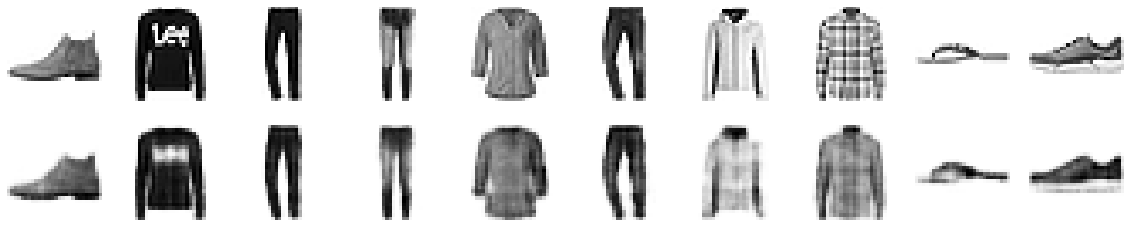

In [21]:
show_reconstructions(conv_ae)